# Сглаживание временного ряда

Имеются данные, характеризующие уровень безработицы в регионе, %

In [2]:
import pandas as pd
num = [2.99,2.66,2.63,2.56,2.40,2.22,1.97,1.72,1.56,1.42]
month = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь']
data = pd.DataFrame({'month':month,'num':num})
data

,month,num
0,Январь,2.99
1,Февраль,2.66
2,Март,2.63
3,Апрель,2.56
4,Май,2.40
5,Июнь,2.22
6,Июль,1.97
7,Август,1.72
8,Сентябрь,1.56
9,Октябрь,1.42


Решение методом экспоненциального сглаживания

In [4]:
import numpy as np
#Определяем значение параметра сглаживания
alpha = 2/(10+1)
#Определяем начальное значение Uo двумя способами:
#І способ (средняя арифметическая) Uo:
Uo1 = data.num.sum()/data.num.count()
#II способ (принимаем первое значение базы прогноза)
Uo2 = 2.99
#Рассчитываем экспоненциально взвешенную среднюю для каждого периода
Un1=np.zeros(len(num))
Un1[0] = Uo1
for i in range(1,len(num)):
    Un1[i]=alpha*num[i-1] + (1-alpha)*Un1[i-1]
#2 способ
Un2=np.zeros(len(num))
Un2[0] = Uo2
for i in range(1,len(num)):
    Un2[i]=alpha*num[i-1] + (1-alpha)*Un2[i-1]
data['observation_value1'] = Un1
data['observation_value2'] = Un2
#вычисляем для ноября
nov1 = alpha*num[-1]+(1-alpha)*Un1[-1]
nov2 = alpha*num[-1]+(1-alpha)*Un2[-1]
print(f'По этой же формуле вычисляем прогнозное значение: {nov1} и {nov2}')

mas_error1 = [abs((num[k]-Un1[k])/num[k])*100 for k in range(len(num))]
mas_error2 = [abs((num[k]-Un2[k])/num[k])*100 for k in range(len(num))]
error1 =round(sum(mas_error1)/(len(Un1)),2)
error2 =round(sum(mas_error2)/(len(Un2)),2)
print(f'Рассчитываем среднюю относительную ошибку: {error1}% и {error2}%')

По этой же формуле вычисляем прогнозное значение: 1.9775786142659437 и 2.08203121591216
Рассчитываем среднюю относительную ошибку: 21.24% и 26.76%


В каждом случае точность прогноза является удовлетворительной поскольку средняя относительная ошибка попадает в пределы 20-50%.


### Метод Скользящей средней 

smoothing even=2.688
smoothing even=2.573
smoothing even=2.462
smoothing even=2.295
smoothing even=2.083
smoothing even=1.86
smoothing even=1.658


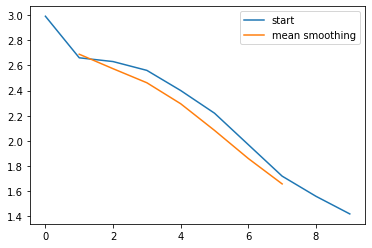

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
#Для временного ряда y1,y2,...,yn определяется интервал сглаживания m (m < n).
m = 4
ax.plot(num,label='start')
before = [num[i] for i in range(m)]
after = [num[i] for i in range(m, len(num))]
res = list()
if (m%2):
    for t in range(len(after)+1):
        length = len(before)
        res.append(np.mean([before[i] for i in range(length-m,length)]))
        if t!=(len(after)):
            before.append(after[t])
        print('smoothing odd={}'.format(np.round(res[t],3)))
else:
    for t in range(len(after)+1):
        length = len(before)
        res.append(((0.5*before[length-m]) + sum([before[i] for i in range(length-m+1,length-1)])+(0.5*before[length-1]))/(m-1))
        if t!=(len(after)):
            before.append(after[t])
        print('smoothing even={}'.format(np.round(res[t],3)))
    
ax.plot(range(1,len(res)+1),res,label='mean smoothing')
ax.legend()